<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


このラボでは、クリーン化されたデータセットを使用して、探索的データ分析またはEDAを実行します。

## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


 -データセットの構造を調べます。

 -欠損値を効果的に処理します。

 -キー列で概要統計を実施します。

 -雇用状況、仕事の満足度、プログラミング言語の使用、およびリモート作業の傾向を分析します。

## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


#### ステップ2：データセットを読み込み、プレビューします
提供されたURLからデータセットをロードします。   
df.head（）を使用して最初の数行を表示して、構造の概要を取得します。

In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


「雇用」、「Joveat」、「Remotework」などの重要な列の欠損値を特定して管理します。欠落データの重要性に応じて、これらの値を埋めるかドロップする戦略を実装します。

In [3]:
## Write your code here

# Check for missing values in key columns
print("Missing values in key columns:")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

# Fill missing values in Employment with 'Not specified'
df['Employment'] = df['Employment'].fillna('Not specified')

# Fill missing values in JobSat with the mode (most common value)
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])

# Fill missing values in RemoteWork with 'Not specified'
df['RemoteWork'] = df['RemoteWork'].fillna('Not specified')

# Verify the changes
print("\nMissing values after handling:")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

Missing values in key columns:
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing values after handling:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


長年の専門的なコーディングエクスペリエンス（「Yearcodepro」）と仕事の満足度（「Joveatat」）の関係を分析します。 「yearscodepro」を要約し、経験範囲に基づいて中央値満足度スコアを計算します。

 -「YearsCodepro」のエクスペリエンス範囲を作成します（例： `0-5`、` 5-10`、 `10-20`、`> 20`）。

 -各範囲の中央値「Joveat」を計算します。

 -バープロットまたは同様の視覚化を使用して関係を視覚化します。


/var/folders/np/lj2crsq11vl__dd5tfxv027m0000gn/T/ipykernel_3454/4062396333.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()


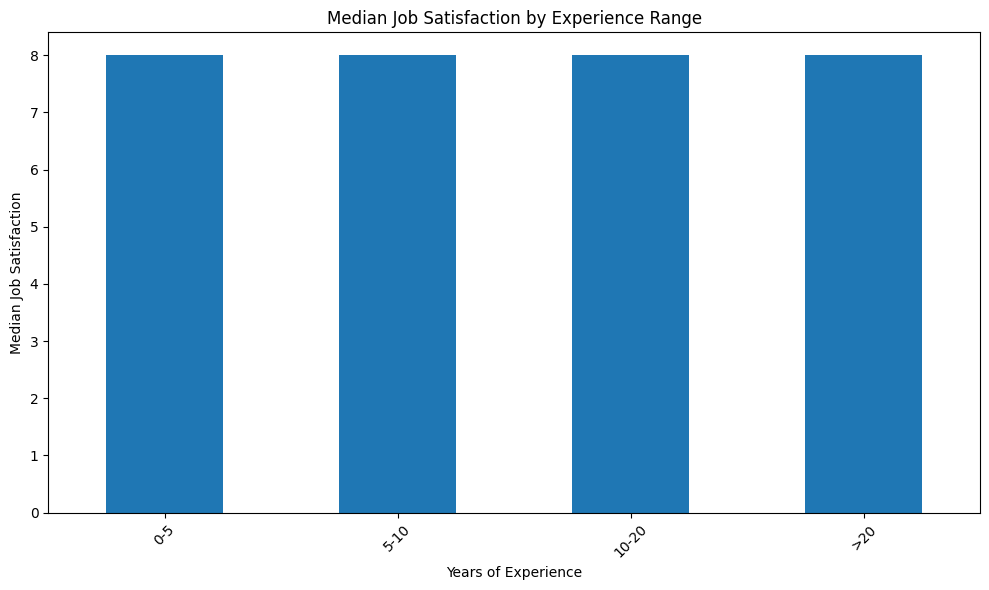

In [5]:
## Write your code here

# Step 4: Analysis of Experience and Job Satisfaction
# Convert YearsCodePro to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create experience ranges
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate median satisfaction for each range
median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()

# Create a bar plot
plt.figure(figsize=(10, 6))
median_satisfaction.plot(kind='bar')
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Years of Experience')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


カウントプロットを使用して、「Joveat」値の分布を表示します。これにより、回答者の全体的な満足度レベルに関する洞察が得られます。

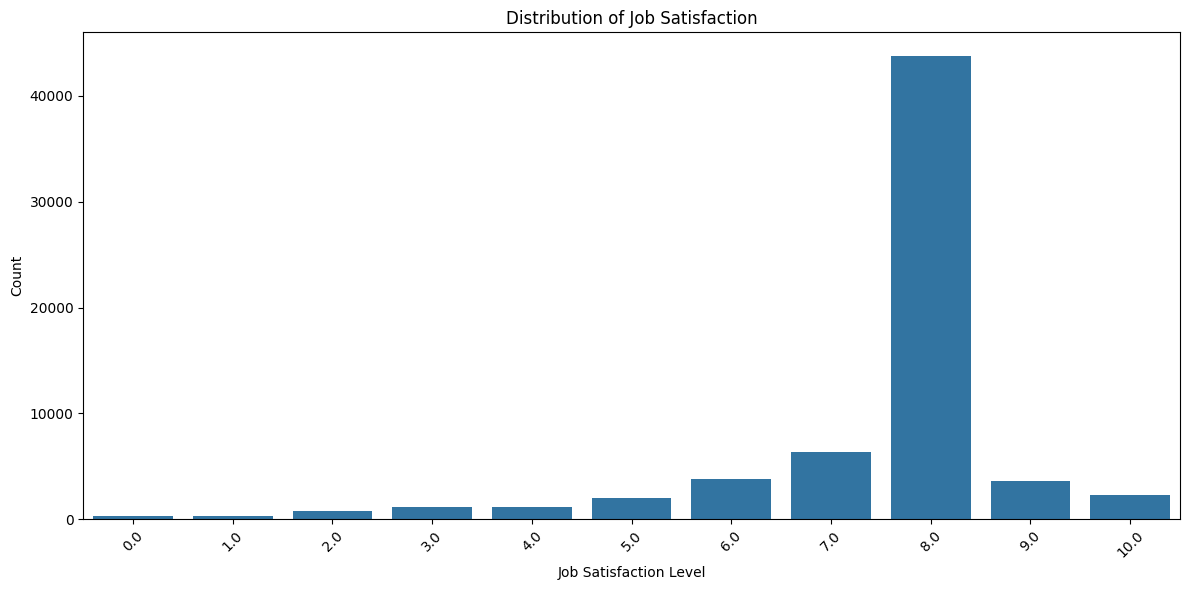

In [7]:
## Write your code here

# Create a count plot for JobSat
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='JobSat')
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


ジョブの役割に基づいて、リモート作業の傾向を分析します。 「Remotework」と「Employment」コラムを使用して、好みを調査し、特定のジョブの役割が他の人よりもリモートワークを好むかどうかを調べます。

 -カウントプロットを使用して、リモート作業分布を表示します。

 -雇用タイプ（フルタイム、パートタイムなど）および職務によるリモートワークの好みを相互に抑制します。

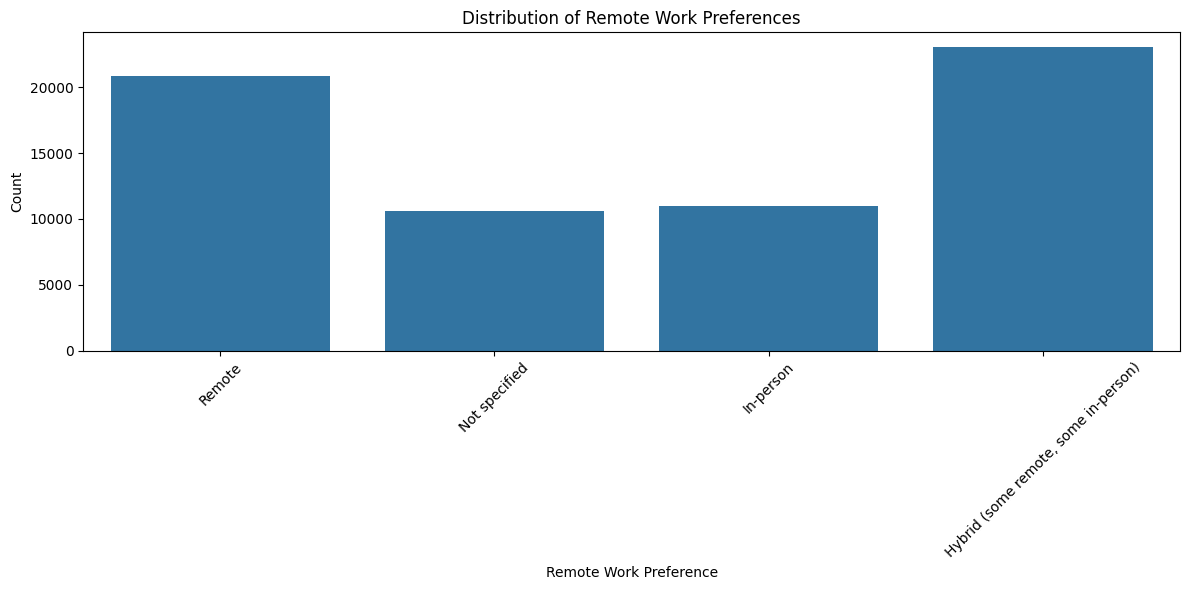


Remote Work Preferences by Employment Type:
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17281   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     4   
Student, full-time;Student, part-time;Retired                                          0   
Student, part-time                 

In [12]:
## Write your code here

# Create a count plot for RemoteWork
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='RemoteWork')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cross-tabulate RemoteWork and Employment
remote_work_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'])
print("\nRemote Work Preferences by Employment Type:")
print(remote_work_by_employment)



#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


地域ごとのプログラミング言語の人気を分析します。 「LanguageHaveWorked」列を使用して、異なる地域で最も使用されている言語を調査します。

 -国または地域ごとにデータをフィルタリングします。

 -バープロットまたはヒートマップを使用して、地域ごとに上位プログラミング言語を視覚化します。

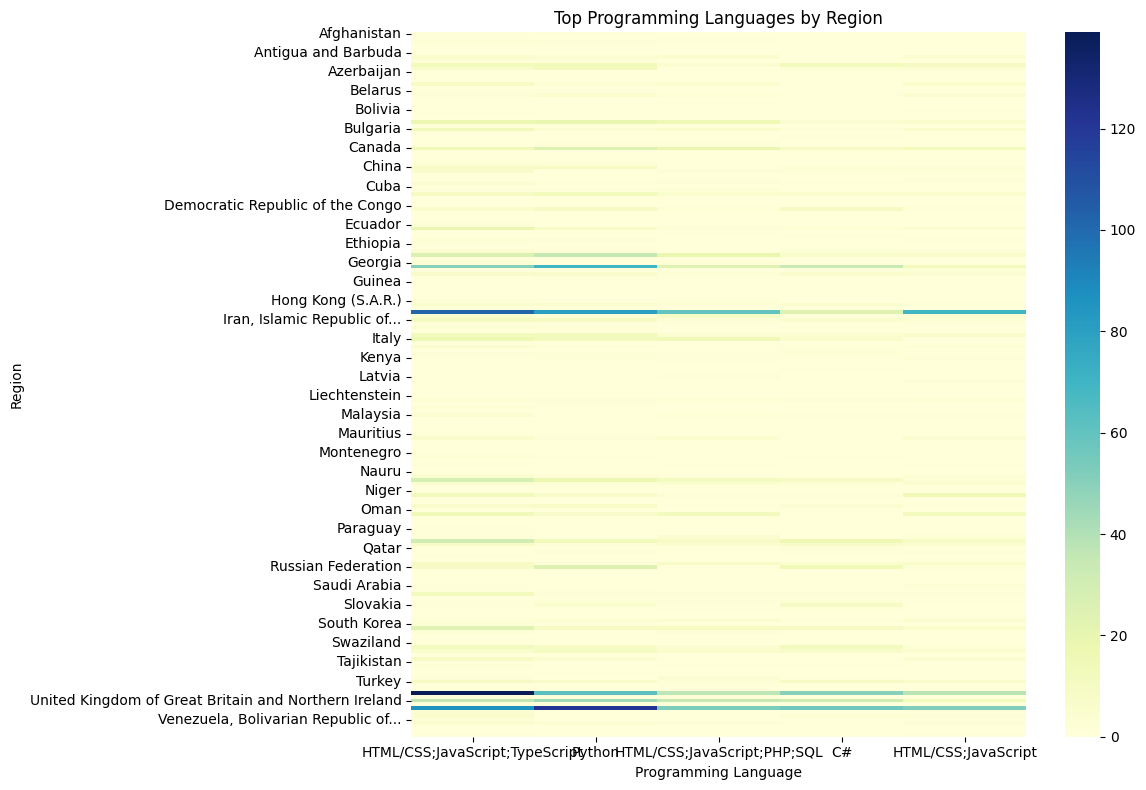

In [13]:
## Write your code here

# Assuming 'Country' column exists, if not, use appropriate region column
# Split the LanguageHaveWorkedWith column and count occurrences
languages_by_region = df.groupby('Country')['LanguageHaveWorkedWith'].value_counts().unstack().fillna(0)

# Get top 5 languages by region
top_languages = languages_by_region.sum().sort_values(ascending=False).head(5).index
languages_by_region = languages_by_region[top_languages]

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(languages_by_region, cmap='YlGnBu')
plt.title('Top Programming Languages by Region')
plt.xlabel('Programming Language')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


年の経験（「YearCodepro」）が仕事の満足度（ `jobesatpoints_1`）とどのように相関するかを調べます。散布図を使用して、この関係を視覚化します。


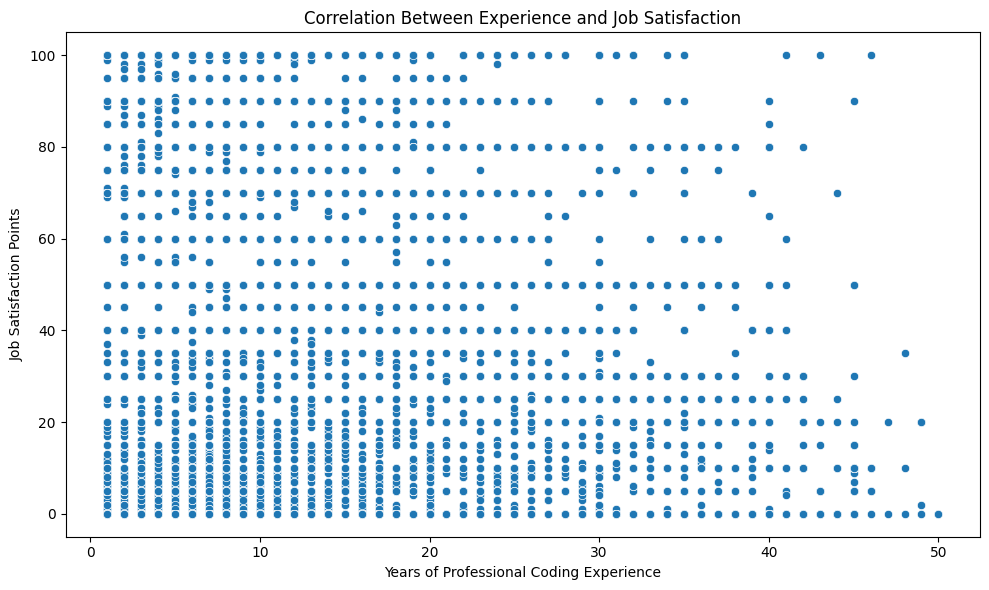


Correlation coefficient: -0.03


In [14]:
## Write your code here

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1')
plt.title('Correlation Between Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Points')
plt.tight_layout()
plt.show()

# Calculate correlation coefficient
correlation = df['YearsCodePro'].corr(df['JobSatPoints_1'])
print(f"\nCorrelation coefficient: {correlation:.2f}")

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


教育の背景（「edlevel」）が雇用タイプ（「雇用」）とどのように関係するかを探ります。クロス30と視覚化を使用して、高等教育が特定の雇用タイプと相関しているかどうかを理解します。

/var/folders/np/lj2crsq11vl__dd5tfxv027m0000gn/T/ipykernel_3454/4156784630.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


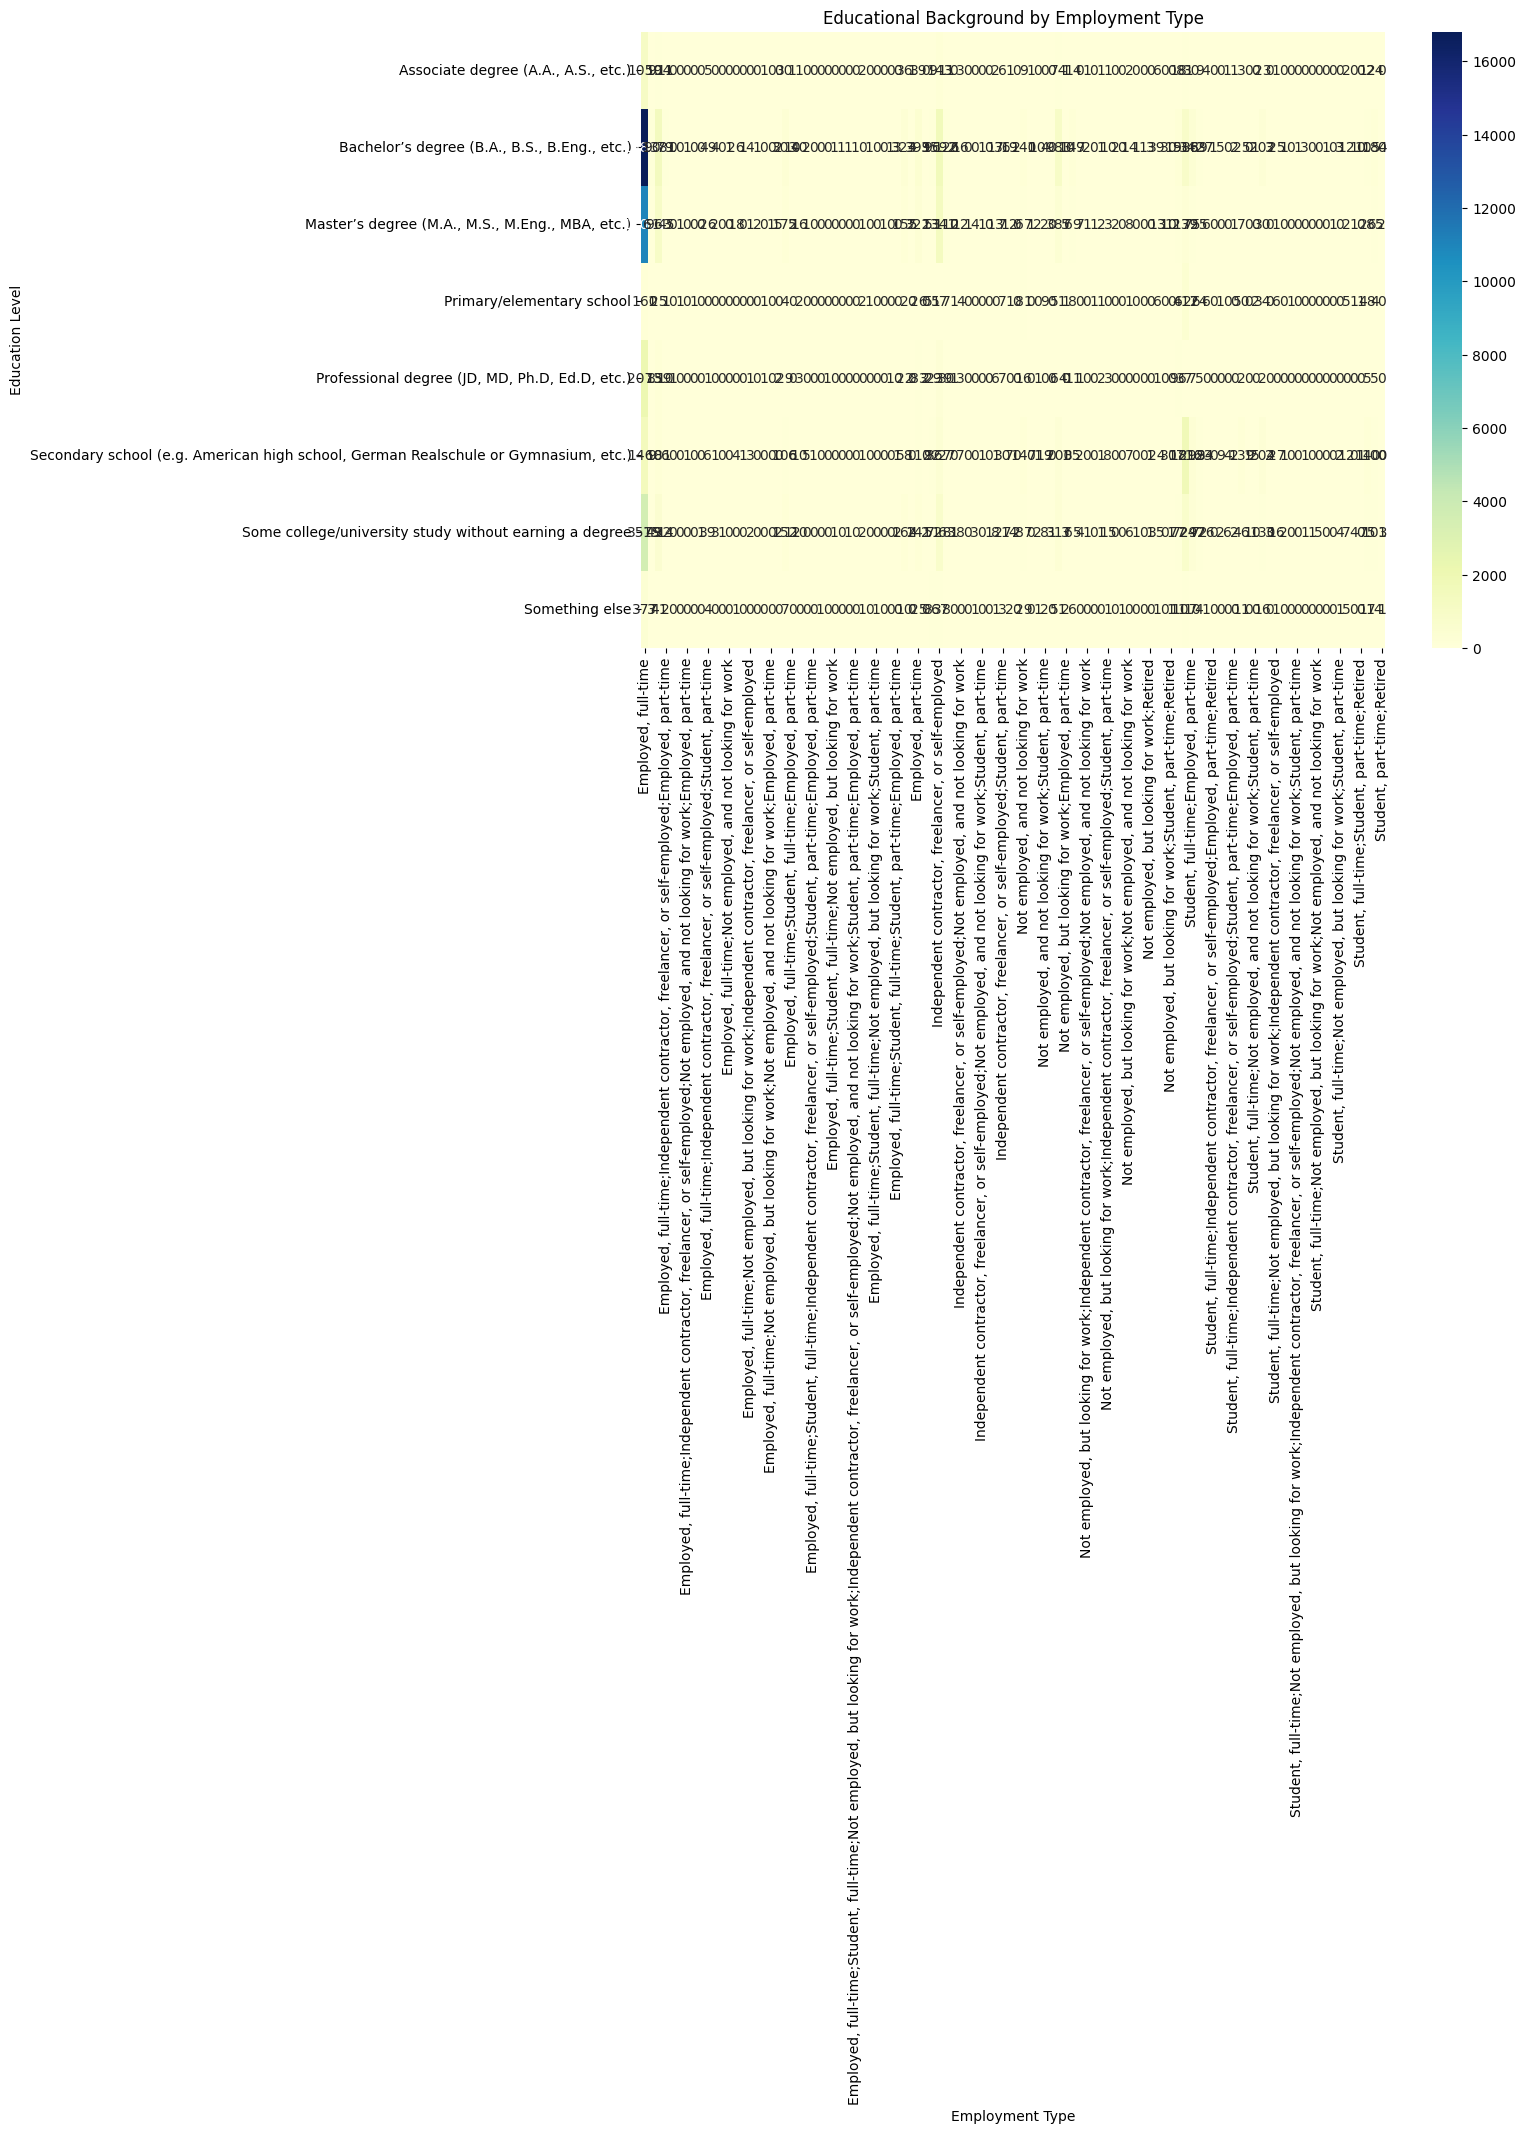

In [15]:
## Write your code here

# Create a cross-tabulation
education_employment = pd.crosstab(df['EdLevel'], df['Employment'])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(education_employment, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Educational Background by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


分析後、変更されたデータセットを保存して、さらに使用または共有します。


In [16]:
## Write your code here

# Save the modified dataset
df.to_csv('cleaned_survey_data.csv', index=False)
print("Dataset saved successfully as 'cleaned_survey_data.csv'")

Dataset saved successfully as 'cleaned_survey_data.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
